In [138]:
#!pip install cufflinks==0.8.2 --user
!pip install mlxtend --quiet

In [139]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.figure_factory as ff
#import cufflinks as cf
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)


In [140]:
from sklearn.model_selection        import train_test_split
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
#from sklearn.linear_model           import Ridge
#from sklearn.linear_model           import Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network         import MLPClassifier
from sklearn.ensemble               import RandomForestClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics                import f1_score
from sklearn.metrics                import accuracy_score
from sklearn.metrics                import precision_score
from sklearn.metrics                import recall_score
from sklearn.metrics import roc_auc_score, log_loss


In [141]:
init_notebook_mode(connected=True)

In [142]:
# The code was removed by Watson Studio for sharing.

In [143]:
def plotJmeter(df,title):
    traces=[]
    for transaction in df['transaction'].unique():
        trace = go.Scatter(
            y=df[df['transaction']==transaction]['avg'],
            x=df[df['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction
        )    
        traces.append(trace)
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="Response Time (ms)"
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [144]:
def plotJmeter2(df1,df2,title):
    traces=[]
    for transaction in df1['transaction'].unique():
        trace = go.Scatter(
            y=df1[df1['transaction']==transaction]['avg'],
            x=df1[df1['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with no background stress"
        )    
        traces.append(trace)
    for transaction in df2['transaction'].unique():
        trace = go.Scatter(
            y=df2[df2['transaction']==transaction]['avg'],
            x=df2[df2['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with background stress"
        )    
        traces.append(trace)        
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="Response Time (ms)"
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [145]:
def plotSkydiveFlows2(df1,df2,title,y_feature,y_title):
    traces=[]
    for name in df1['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df1[df1['_source.NodeTID']==name][y_feature],
            x=df1[df1['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            #connectgaps=True,
            name=name+" with no background stress"
        )    
        traces.append(trace)
    for name in df2['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df2[df2['_source.NodeTID']==name][y_feature],
            x=df2[df2['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            #connectgaps=True,
            name=name+" with background stress"
        )    
        traces.append(trace)           
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title=y_title
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [146]:
def plotSkydiveFlows(df,title,y_feature,y_title):
    traces=[]
    for name in df['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df[df['_source.NodeTID']==name][y_feature],
            x=df[df['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            #connectgaps=True,
            name=name
        )    
        traces.append(trace)        
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
            ),
            yaxis=dict(
                title=y_title
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [147]:
def plot4(df1,df2,df3,df4,title):
    traces=[]
    for transaction in df1['transaction'].unique():
        trace = go.Scatter(
            y=df1[df1['transaction']==transaction]['avg'],
            x=df1[df1['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with no background stress",
            text = ["with no background stress"],
            textposition='top right'
        )    
        traces.append(trace)
    for transaction in df2['transaction'].unique():
        trace = go.Scatter(
            y=df2[df2['transaction']==transaction]['avg'],
            x=df2[df2['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with background stress"
        )    
        traces.append(trace)
    for name in df3['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df3[df3['_source.NodeTID']==name]['_source.Metric.RTT'],
            x=df3[df3['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with no background stress",
            xaxis='x2',
            yaxis='y2'
        )    
        traces.append(trace)
    for name in df4['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df4[df4['_source.NodeTID']==name]['_source.Metric.RTT'],
            x=df4[df4['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with background stress",
            xaxis='x2',
            yaxis='y2'            
        )    
        traces.append(trace)             
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="ms"
            )
    )
    layout = go.Layout(
        title=title,
        xaxis=dict(
                       
            domain=[0, 1]
        ),
        yaxis=dict(
            title="response time (QoE)",
            domain=[0.55, 1]
            
        ),
        xaxis2=dict(
            #title="time",
            domain=[0, 1],
            anchor='y2'
        ),


        yaxis2=dict(
            title="RTT (QoE)",
            domain=[0, 0.45]
            
        ),
        showlegend=False,
        annotations = [
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  #x = 0.2951769406393,
                  x = 0.8,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.8,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            )            
            
        ]

    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [148]:
def plotQoEQoS(df1,df2,df3,df4,y_feature,y_title1,y_title2,title):
    traces=[]
    for transaction in df1['transaction'].unique():
        trace = go.Scatter(
            y=df1[df1['transaction']==transaction]['avg'],
            x=df1[df1['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with no background stress",
            text = ["with no background stress"],
            textposition='top right'
        )    
        traces.append(trace)
    for transaction in df2['transaction'].unique():
        trace = go.Scatter(
            y=df2[df2['transaction']==transaction]['avg'],
            x=df2[df2['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with background stress"
        )    
        traces.append(trace)
    for name in df3['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df3[df3['_source.NodeTID']==name][y_feature],
            x=df3[df3['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with no background stress",
            xaxis='x2',
            yaxis='y2'
        )    
        traces.append(trace)
    for name in df4['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df4[df4['_source.NodeTID']==name][y_feature],
            x=df4[df4['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with background stress",
            xaxis='x2',
            yaxis='y2'            
        )    
        traces.append(trace)             
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="ms"
            )
    )
    layout = go.Layout(
        title=title,
        xaxis=dict(
                       
            domain=[0, 1]
        ),
        yaxis=dict(
            title=y_title1,
            domain=[0.55, 1]
            
        ),
        xaxis2=dict(
            #title="time",
            domain=[0, 1],
            anchor='y2'
        ),


        yaxis2=dict(
            title=y_title2,
            domain=[0, 0.45]
            
        ),
        showlegend=False,
        annotations = [
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  #x = 0.2951769406393,
                  x = 0.8,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.8,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            )            
            
        ]

    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [149]:
def plot6(df1,df2,df3,df4,df5,df6,title):
    traces=[]
    for transaction in df1['transaction'].unique():
        trace = go.Scatter(
            y=df1[df1['transaction']==transaction]['avg'],
            x=df1[df1['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with no background stress",
            text = ["with no background stress"],
            textposition='top right'
        )    
        traces.append(trace)
    for transaction in df2['transaction'].unique():
        trace = go.Scatter(
            y=df2[df2['transaction']==transaction]['avg'],
            x=df2[df2['transaction']==transaction]['time'],
            mode = 'markers',
            connectgaps=True,
            name=transaction+" "+"with background stress"
        )    
        traces.append(trace)
    for name in df3['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df3[df3['_source.NodeTID']==name]['_source.Metric.RTT'],
            x=df3[df3['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with no background stress",
            xaxis='x2',
            yaxis='y2'
        )    
        traces.append(trace)
    for name in df4['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df4[df4['_source.NodeTID']==name]['_source.Metric.RTT'],
            x=df4[df4['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with background stress",
            xaxis='x2',
            yaxis='y2'            
        )    
        traces.append(trace)
    for name in df5['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df5[df5['_source.NodeTID']==name]['time_to_FIN'],
            x=df5[df5['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with no background stress",
            xaxis='x3',
            yaxis='y3'
        )    
        traces.append(trace)
    for name in df6['_source.NodeTID'].unique():
        trace = go.Scatter(
            y=df6[df6['_source.NodeTID']==name]['time_to_FIN'],
            x=df6[df6['_source.NodeTID']==name]['_source.Metric.Last'],
            mode = 'markers',
            connectgaps=True,
            name=name+" with background stress",
            xaxis='x3',
            yaxis='y3'            
        )    
        traces.append(trace)            
  
       
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title="time",
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title="ms"
            )
    )
    layout = go.Layout(
        title=title,
        xaxis=dict(                       
            domain=[0, 1],
            anchor='y2'
        ),
        yaxis=dict(
            title="response time (QoE)",
            domain=[0, 0]
            
        ),
        xaxis2=dict(
            #title="time",
            domain=[0.55, 1],
            anchor='y2'
            
        ),
        yaxis2=dict(
            title="RTT (QoE)",
            domain=[0, 0.45]
            
        ),
        xaxis3=dict(
            #title="time",
            domain=[0.55, 1],
            anchor='y3'
        ),
        yaxis3=dict(
            title="Time to FIN (QoE)",
            domain=[0, 1]
            
        ),        
        showlegend=False,
        annotations = [
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  #x = 0.2951769406393,
                  x = 0.8,
                  #y = 0.96972670892,
                  y = 1,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.0951769406393,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "Without Stress",
                  xref = "paper",
                  yref = "paper"
            ),
            dict(
                  #x = -0.0951769406393,
                  x = 0.8,
                  y = 0.36972670892,
                  showarrow = False,
                  text = "With Stress",
                  xref = "paper",
                  yref = "paper"
            )            
            
        ]

    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [150]:
#deprecated
def _plotModelEstimates(actual,prediction,xTitle,yTitle,title,names):
    #s = list(map(str,df['begin']))
    #print(s)
    xList = list(range(len(actual)))
    actualBar = go.Scatter(
        y=actual,
        #x=df[xFeature].astype(str),
        x = xList,
        mode = 'markers',
        connectgaps=False,      
        name='actual'
        #text=actual,
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    predictionBar = go.Scatter(
        y=prediction,
        #x=df[xFeature].astype(str),
        x = xList,
        mode = 'markers',
        connectgaps=False,        
        name='prediction'
        #text=prediction,
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
  
    
    data = [actualBar,predictionBar]
    if(len(names)>2):
        shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': names[0], # use absolute value or variable here
                            'x1': len(xList),
                            'y1': names[0], 
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            },
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': names[1], # use absolute value or variable here
                            'x1': len(xList),
                            'y1': names[1], # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            },
                        },
                    ]
       
    else:
        shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': names[0], # use absolute value or variable here
                            'x1': len(xList),
                            'y1': names[0], # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title=xTitle,
                #tickvals=df[xFeature].astype(str),
                tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle,
                tickformat=',d'
            ),
            shapes=shapes
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [151]:
def plotWithBoundaries(df,yFeature,xTitle,yTitle,title,low,high):
    #s = list(map(str,df['begin']))
    #print(s)
    #xList = list(range(len(df['begin'])))
    xList = list(range(len(df[yFeature])))
    #xList = list(df[xFeature].unique())
    trace = go.Bar(
        y=df[yFeature],
        #x=df[xFeature].astype(str),
        x=xList,
        name='sample'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    data = [trace]
    #data = [maxBar,meanBar,minBar]
    if low <= high:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': low, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': low, # ditto
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    else:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
        
        
    layout = go.Layout(
            #barmode='overlay',
            title=title,
            xaxis=dict(
                #tickformat = '%d',
                title=xTitle
                #tickvals=df[xFeature].astype(str),
                #tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle                
            ),
            shapes=shapes

    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [152]:
def plot4MsWithThreshholds(df,xFeature,yFeature,xTitle,yTitle,title,low,high):
    #s = list(map(str,df['begin']))
    #print(s)
    #xList = list(range(len(df['begin'])))
    xList = list(range(len(df[xFeature])))
    xList = list(df[xFeature].unique())
    minBar = go.Bar(
        y=df[yFeature]['min'],
        #x=df[xFeature].astype(str),
        x=xList,
        name='min'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    meanBar = go.Bar(
        y=df[yFeature]['mean'],
        #x=df[xFeature].astype(str),
        x = xList,
        name='mean'
        #text=df[yFeature]['mean'],
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    medianBar = go.Bar(
        y=df[yFeature]['median'],
        #x=df[xFeature].astype(str),
        x = xList,
        name='median'
        #text=df[yFeature]['median'],
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    maxBar = go.Bar(
        y=df[yFeature]['max'],
        #x=df[xFeature].astype(str),
        x=xList,
        name='max'
        #text=df.duration['max'],
        #textposition="outside",
        #opacity=5,
        #width=1,
        #orientation='vertical'
        
    )
    
    data = [maxBar,medianBar,meanBar,minBar]
    #data = [maxBar,meanBar,minBar]
    if low <= high:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': low, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': low, # ditto
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    else:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
        
        
    layout = go.Layout(
            barmode='overlay',
            title=title,
            xaxis=dict(
                #tickformat = '%d',
                title=xTitle,
                #tickvals=df[xFeature].astype(str),
                tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle
            ),
            shapes=shapes

    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [153]:
def plot4Ms(df,xFeature,yFeature,xTitle,yTitle,title):
    #s = list(map(str,df['begin']))
    #print(s)
    #xList = list(range(len(df['begin'])))
    xList = list(range(len(df[xFeature])))
    minBar = go.Bar(
        y=df[yFeature]['min'],
        #x=df[xFeature].astype(str),
        x=xList,
        name='min'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    meanBar = go.Bar(
        y=df[yFeature]['mean'],
        #x=df[xFeature].astype(str),
        x = xList,
        name='mean'
        #text=df[yFeature]['mean'],
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    medianBar = go.Bar(
        y=df[yFeature]['median'],
        #x=df[xFeature].astype(str),
        x = xList,
        name='median'
        #text=df[yFeature]['median'],
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        #orientation='vertical'
    )
    maxBar = go.Bar(
        y=df[yFeature]['max'],
        #x=df[xFeature].astype(str),
        x=xList,
        name='max'
        #text=df.duration['max'],
        #textposition="outside",
        #opacity=5,
        #width=1,
        #orientation='vertical'
        
    )
    
    data = [maxBar,medianBar,meanBar,minBar]
    #data = [maxBar,meanBar,minBar]
    layout = go.Layout(
            barmode='overlay',
            title=title,
            xaxis=dict(
                #tickformat = '%d',
                title=xTitle,
                #tickvals=df[xFeature].astype(str),
                tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle
            )
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [154]:
def getdfLaterHalf(df,time):    
    halfway =  (df[time].min() + (df[time].max() - df[time].min()) / 2)    
    return(df[df[time] >= halfway])


In [155]:
def getRTTDiff(df):
    dfRTTDiff = df[['_source.TrackingID','_source.Metric.Last','_source.NodeTID','_source.Metric.RTT']].copy()
    dfRTTDiff.sort_values(by=['_source.TrackingID','_source.Metric.Last','_source.NodeTID'], ascending=[True,True,True], inplace=True)
    dfRTTDiff['diffs'] = dfRTTDiff.groupby(['_source.TrackingID'])['_source.Metric.RTT'].transform(lambda x: x.diff().abs())
    #print(dfRTTDiff.head(10))
    dfRTTDiff = dfRTTDiff.groupby(['_source.TrackingID'], as_index=False).agg({'_source.NodeTID': ' - '.join, '_source.Metric.Last': 'first','diffs' : 'last'})
    return(dfRTTDiff)


In [156]:
def massageSkydiveFlows(df):
   
    df = df[df['Application'] == 'TCP']
    df = df[df['Transport.Protocol'] == 'TCP']
    df = df[df['Transport.B'] == 80]
    #print(df.count()) 
    df['flow_duration'] = df['Metric.Last'] - df['Metric.Start']
    df = df.dropna(subset=['flow_duration'])
    df = df.dropna(subset=['Metric.RTT'])
    df['flow_duration'] = df['flow_duration'].astype(int).dropna()
    df['Metric.RTT'] = df['Metric.RTT'].astype(int).dropna()
    df['Metric.ABBytes'] = df['Metric.ABBytes'].astype(int).dropna()
    df['Metric.BABytes'] = df['Metric.BABytes'].astype(int).dropna()
    df['Metric.ABPackets'] = df['Metric.ABPackets'].astype(int).dropna()
    df['Metric.BAPackets'] = df['Metric.BAPackets'].astype(int).dropna() 

    df['bytes_per_flow'] = (df['Metric.ABBytes'] + df['Metric.BABytes']) / df['flow_duration']
    df['AB_bytes_per_flow'] = df['Metric.ABBytes']  / df['flow_duration']
    df['BA_bytes_per_flow'] = df['Metric.BABytes']  / df['flow_duration']
    
    df['packets_per_flow'] = (df['Metric.ABPackets'] + df['Metric.BAPackets']) / df['flow_duration']
    df['AB_packets_per_flow'] = df['Metric.ABPackets'] / df['flow_duration']
    df['BA_packets_per_flow'] = df['Metric.BAPackets'] / df['flow_duration']
    #df['flow_duration'] = df['flow_duration'].apply(lambda x: x*100) # convert to ms
    #print(dfSkydiveFlowsNoStress[['flow_duration','Metric.RTT']].head(10)) 
    df['Metric.Last'] = pd.to_datetime(df['Metric.Last'],unit='ms')
    df['Metric.Start'] = pd.to_datetime(df['Metric.Start'],unit='ms') 
    #df['NodeTID'] = df['NodeTID'].replace(['c989a779-c295-52da-6041-3f287488faa1'],'wp_eth0')
    #df['NodeTID'] = df['NodeTID'].replace(['8c451cd5-a37f-5e51-7d89-8c2cc2c5e88d'],'calico')
    #df = df[df['NodeTID'] != 'b40081de-0060-5816-54c4-c3907e470941']
    #q = df['Metric.RTT'].quantile(0.99)
    #df = df[df['Metric.RTT']<q]

    #q = df['flow_duration'].quantile(0.99)
    #df = df[df['flow_duration']<q] 
    #print(df.count()) 
    return(df)
    

In [157]:
def massageJmeter(df):
    df = df[df.transaction != 'internal']
    #df = df[df['transaction'] == 'all']  # for now just to get an overall average
    df = df[df['statut'] == 'ok']
    df["time"] = pd.to_datetime(df["time"],unit='ms')
    #df["avg"] = df["avg"].apply(lambda x: x*1000000)
    df = df.dropna(subset=['avg'])
    df['avg'] = df['avg'].astype(int)
    q = df['avg'].quantile(0.99)
    df = df[df['avg']<q]
    return(df)    
   

In [158]:
def massageIndex(df,begin_plus,end_less):
    df.begin = df.begin + (begin_plus*60000)
    df.end = df.end - (end_less*60000)
    df["stress_test"] = df["stress_test"].astype(str)
    dfIndex["stress_test"] = dfIndex["stress_test"].replace("no_stress"," no_stress")
    df["stress_test"] = df["stress_test"].replace(to_replace=r'^stress-*',value='',regex=True)
    df["stress_test"] = df["stress_test"].replace(to_replace=r'_test.yaml',value='',regex=True)
    df["stress_test"] = df["stress_test"].replace(to_replace=r'r1g1',value='',regex=True)
    q = df['elapse_time'].quantile(0.99)
    df = df[df['elapse_time']<q] 
    return(df)

In [159]:
def labelDF(dfLabels,df,time):
    a = df[time].values
    bh = dfLabels.end.values
    bl = dfLabels.begin.values

    i, j = np.where((a[:, None] > bl) & (a[:, None] < bh))

    return (pd.DataFrame(
        np.column_stack([df.values[i], dfLabels.values[j]]),
        columns=df.columns.append(dfLabels.columns)
    ))

In [160]:
def maxMedian(dfIndex,dfJmeter):
    maxM=0
    maxBegin=0
    maxEnd=0
    maxStress=''
    noStressIndex=0
    for index, row in dfIndex.iterrows():
        if row.stress_test == "no_stress":
            noStressIndex=index
            continue
        df=dfJmeter[(dfJmeter['time'] > row.begin) & (dfJmeter['time'] < row.end)]
        m=df.avg.median()
        if m > maxM:
            maxM=m
            maxIndex=index
            maxStress=row.stress_test
            maxNoStressPair=noStressIndex
    return(maxIndex,maxNoStressPair)        


In [161]:
def getDFs(suffixes):
    jMeterFrame = []
    skydiveFrame = []
    indexFrame = []
    for s in suffixes:
        dfTemp,err = getDF("jmeter{}.csv".format(s))
        if err != "":
            print(err)
            raise Error(err)
        jMeterFrame.append(dfTemp)    
       
    
        dfTemp,err = getDF("skydiveFlows{}.csv".format(s))
        if err != "":
            print(err)
            raise Error(err)
        skydiveFrame.append(dfTemp)
        temp=pd.concat(skydiveFrame)
        if not temp[temp.duplicated()].empty:
            print("ERROR duplicates found in skydiveFlows when adding suffix",s)
        
        dfTemp,err = getDF("workload_stress_begin_end_{}.csv".format(s))    
        if err != "":
            print(err)
            raise Error(err)
        indexFrame.append(dfTemp)
        temp=pd.concat(indexFrame)
        if not temp[temp.duplicated()].empty:
            print("ERROR duplicates found in index when adding suffix",s)
        
        
    dfJmeter=pd.concat(jMeterFrame)
    dfSkydiveFlows=pd.concat(skydiveFrame)
    dfIndex=pd.concat(indexFrame)            
    
    return(dfJmeter,dfSkydiveFlows,dfIndex)

In [162]:
## Examine multiple samples

def plotAgg2(df1,df2,yAgg1,yfeature1,yAgg2,yfeature2,xfeature,yname1,yname2,xtitle,ytitle,title):
    traces=[]
    trace = go.Scatter(
            y=df1[yAgg1][yfeature1],
            x=df1[xfeature],
            mode = 'markers',
            connectgaps=True,
            name=yname1
    )    
    traces.append(trace)
    trace = go.Scatter(
            y=df2[yAgg2][yfeature2],
            x=df2[xfeature],
            mode = 'markers',
            connectgaps=True,
            name=yname2
    )    
    traces.append(trace)
    layout = go.Layout(
            barmode='group',
            title=title,
            xaxis=dict(
                title=xtitle
                #tickvals=xtickvals
            ),
            yaxis=dict(
                title=ytitle
            )
    )

    fig = go.Figure(data=traces, layout=layout)
    iplot(fig)    

In [165]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=ResourceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
pd.options.mode.chained_assignment = None  

#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628","190703","190707","190710"]) #
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628","190703","190710"]) #
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628","190703"]) #
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628"]) #
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190627","190628","190728"])
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190728","190729","190730"])
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190807"])
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190808"])
#dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190808","190810","190811","190813","190815",'190816']) # this is for wp4
dfJmeter, dfSkydiveFlows, dfIndex = getDFs(["190826","190828","190829"]) # these are for wp5
#print("Training Sample",dfIndex.shape[0])

benchmarkUnderTest = "wp5" 


                                            
#dfIndex = massageIndex(dfIndex,1,2.5)
dfIndex = massageIndex(dfIndex,0,0)

    
dfJmeterLabeled = labelDF(dfIndex,dfJmeter,'time')


#dfSkydiveFlowsLabeled = labelDF(dfIndex,dfSkydiveFlows,'_source.Metric.Last')
dfSkydiveFlowsLabeled = dfSkydiveFlows
  
dfJmeterLabeled = massageJmeter(dfJmeterLabeled)
dfSkydiveFlowsLabeled = massageSkydiveFlows(dfSkydiveFlowsLabeled)

dfJmeterLabeled = dfJmeterLabeled[dfJmeterLabeled.begin.isin(dfSkydiveFlowsLabeled.begin.unique())]
dfIndex = dfIndex[dfIndex.begin.isin(dfSkydiveFlowsLabeled.begin.unique())]
dfSkydiveFlowsLabeled = dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled.begin.isin(dfIndex.begin.unique())]

    

    

#print("dfJmeterLabeled.count()",dfJmeterLabeled.count())

#print("Skydive flows in training set",dfSkydiveFlowsLabeled.shape[0])
#print("Training Sample",dfIndex.shape[0])



In [166]:
 
pd.options.mode.chained_assignment = None

#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190630"])
#fJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190703"])
#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190627","190628","190703"])
#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190806"])
#dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190806","190807","190812"]) # these are for wp4
dfJmeter, dfSkydiveFlows, dfIndexTest = getDFs(["190822"]) # these are for wp5


#dfIndex = massageIndex(dfIndex,1,2.5)
dfIndexTest = massageIndex(dfIndexTest,0,0)
#print('dfIndexTest shape',dfIndexTest.shape)
    
dfJmeterLabeledTest = labelDF(dfIndexTest,dfJmeter,'time')

#dfSkydiveFlowsLabeledTest = labelDF(dfIndexTest,dfSkydiveFlows,'_source.Metric.Last')
dfSkydiveFlowsLabeledTest = dfSkydiveFlows
dfJmeterLabeledTest = massageJmeter(dfJmeterLabeledTest)
dfSkydiveFlowsLabeledTest = massageSkydiveFlows(dfSkydiveFlowsLabeledTest)

dfJmeterLabeledTest = dfJmeterLabeledTest[dfJmeterLabeledTest.begin.isin(dfSkydiveFlowsLabeledTest.begin.unique())]

dfIndexTest = dfIndexTest[dfIndexTest.begin.isin(dfSkydiveFlowsLabeledTest.begin.unique())]
dfSkydiveFlowsLabeledTest = dfSkydiveFlowsLabeledTest[dfSkydiveFlowsLabeledTest.begin.isin(dfIndexTest.begin.unique())]

  


# Estimating Client Satisfaction (QoE) from Server Side Network QoS metrics
See PoC and notebook description [here](https://github.com/KennethNagin/slicenet/blob/master/docs/QoEfromQoSwithSkydiver.md)

In [167]:
dfIndexLabeledAgg = dfIndex.groupby(['stress_test']).agg({'elapse_time': ['min','max','median','mean','std']}).dropna().reset_index()
dfJmeterLabeledAgg = dfJmeterLabeled.groupby(['begin','application']).agg({'avg': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'flow_duration': ['min','max','median','mean','std','count']}).dropna().reset_index()
dfSkydiveFlowsRTTLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'Metric.RTT': ['min','max','median','mean','std']}).dropna().reset_index()
dfJmeterLabeledAggTest = dfJmeterLabeledTest.groupby(['begin','application']).agg({'avg': ['min','max','median','mean','std']}).dropna().reset_index()

dfSkydiveFlowsLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin']).agg({'flow_duration': ['min','max','median','mean','std','count']}).dropna().reset_index()
dfSkydiveFlowsRTTLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin']).agg({'Metric.RTT': ['min','max','median','mean','std']}).dropna().reset_index()

dfSkydiveFlowsBytesPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'bytes_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsBytesPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin']).agg({'bytes_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsABBytesPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'AB_bytes_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsABBytesPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin']).agg({'AB_bytes_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsBABytesPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'BA_bytes_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsBABytesPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin']).agg({'BA_bytes_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()

dfSkydiveFlowsPacketsPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'packets_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsPacketsPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin']).agg({'packets_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsABPacketsPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'AB_packets_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsABPacketsPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin']).agg({'AB_packets_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsBAPacketsPerFlowLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin']).agg({'BA_packets_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()
dfSkydiveFlowsBAPacketsPerFlowLabeledAggTest = dfSkydiveFlowsLabeledTest.groupby(['begin']).agg({'BA_packets_per_flow': ['min','max','median','mean','std']}).dropna().reset_index()

### Classification boundaries where the QoE target is Benchmark Duration. 
Classifications based on benchmark durations with no backgroud stress: 
* Binary Classification decision boundaries:  
 * good: range(0,min(max,median + standard deviation * 3)
 * bad: range(min(max,median + standard deviation * 3),infinity)
* MultiClass Classification decision boundaries:
 * good: range(0,median)
 * acceptable: range(median,min(max,median + standard deviation * 3))
 * bad: range(min(max,median + standard deviation * 3),infinity)

In [168]:
def createClassificationStats(dfIn,dfStats,Classificaton_Type,Sample_Set,QoE):
    i = 0
    for r in dfIndexTemp.groupby('range')['elapse_time'].count().reset_index(name='Count').to_dict(orient='records'):
        dfStats = dfStats.append({
            'Classification Type': Classificaton_Type,
            'Class': i,
            'Corresponding Range': r['range'],
            'QoE': QoE[i],
            'Sample Set': Sample_Set,
            'Number of Samples': r['Count']        
        },ignore_index=True)
        i = i+1
    return(dfStats)


In [169]:
dfIndexLabeledAgg = dfIndex.groupby(['stress_test']).agg({'elapse_time': ['min','max','median','mean','std']}).dropna().reset_index()
dfIndexNoStressAgg  = dfIndexLabeledAgg[dfIndexLabeledAgg["stress_test"] == " no_stress"]
dfIndexNoStress  = dfIndex[dfIndex["stress_test"] == " no_stress"]
indexNoStressLow = round(max(dfIndexNoStressAgg['elapse_time']['median']))
medianDuration_plus = round(max(dfIndexNoStressAgg['elapse_time']['median']+dfIndexNoStressAgg['elapse_time']['std']*3))
maxDuration = round(max(dfIndexNoStressAgg['elapse_time']['max']))
indexNoStressHigh = min(medianDuration_plus,maxDuration)


In [170]:
print("benchmark under test",benchmarkUnderTest)
print("training set size",dfIndex.shape[0])
print("testing set size",dfIndexTest.shape[0])

bins = [0,indexNoStressHigh,np.inf]
bottom = "0-{}".format(indexNoStressHigh)
top = "{}-infinity".format(indexNoStressHigh)
names = [bottom,top]
dfClassificationStats = pd.DataFrame(columns = ['Classification Type' , 'Class', 'Corresponding Range',"QoE",'Sample Set', 'Number of Samples'])
dfIndexTemp = dfIndex
dfIndexTemp["range"] = pd.cut(dfIndexTemp['elapse_time'], bins,labels=names)
dfClassificationStats = createClassificationStats(dfIndexTemp,dfClassificationStats,"Binary Classification","Training",["good","bad"])
dfIndexTemp = dfIndexTest
dfIndexTemp["range"] = pd.cut(dfIndexTemp['elapse_time'], bins,labels=names)
dfClassificationStats = createClassificationStats(dfIndexTemp,dfClassificationStats,"Binary Classification","Testing",["good","bad"])
bins = [0,indexNoStressLow,indexNoStressHigh,np.inf]
bottom = "0-{}".format(indexNoStressLow)
middle =  "{}-{}".format(indexNoStressLow,indexNoStressHigh)
top = "{}-infinity".format(indexNoStressHigh)
names = [bottom,middle,top]
dfIndexTemp = dfIndex
dfIndexTemp["range"] = pd.cut(dfIndexTemp['elapse_time'], bins,labels=names)
dfClassificationStats = createClassificationStats(dfIndexTemp,dfClassificationStats,"Multiclass Classification","Training",["good","acceptable","bad"])
dfIndexTemp = dfIndexTest
dfIndexTemp["range"] = pd.cut(dfIndexTemp['elapse_time'], bins,labels=names)
dfClassificationStats = createClassificationStats(dfIndexTemp,dfClassificationStats,"Multiclass Classification","Testing",["good","acceptable","bad"])
table = ff.create_table(dfClassificationStats)    
iplot(table)

benchmark under test wp5
training set size 969
testing set size 246


In [171]:
plotWithBoundaries(dfIndexNoStress.sort_values(by=['elapse_time']),'elapse_time','training samples (no_stress only)','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +' (no_stress only)<br>Single threshold for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndex.sort_values(by=['elapse_time']),'elapse_time','training samples','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Single threshold boundary for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndexTest.sort_values(by=['elapse_time']),'elapse_time','testing stress configurations','benchmark duration (ms)','Testing Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Single threshold boundary for Binary Classification',indexNoStressHigh,indexNoStressHigh)
plotWithBoundaries(dfIndexNoStress.sort_values(by=['elapse_time']),'elapse_time','training samples (no_stress only)','benchmark duration (ms)','Workload Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +' (no_stress only)<br>Multiple thresholds for Multiclass Classification',indexNoStressLow,indexNoStressHigh)
plotWithBoundaries(dfIndex.sort_values(by=['elapse_time']),'elapse_time','training samples','benchmark duration (ms)','Training Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Multiple threshold boundaries for Multiclass Classification',indexNoStressLow,indexNoStressHigh)
plotWithBoundaries(dfIndexTest.sort_values(by=['elapse_time']),'elapse_time','testing samples','benchmark duration (ms)','Testing Set Benchmark Duration (QoE)<br> benchmark under test {}:'.format(benchmarkUnderTest) +'<br>Multiple threshold boundaries for Multiclass Classification',indexNoStressLow,indexNoStressHigh)

In [172]:
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import roc_auc_score, log_loss
import time
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
@ignore_warnings(category=UserWarning)
@ignore_warnings(category=ConvergenceWarning)

def QoEEstimator(classifiers,X_train, y_train,X_test,y_test):
    np.seterr(over='ignore')

    #print("training set size",X_train.shape[0])
    #print("testing set size",y_test.shape[0])

    dfValidationScores = pd.DataFrame(columns = ['Classifier' , 'f1_score', 'accuracy_score', 'log_loss_score','precision_score', 'recall_score'])
    #dfValidationScores = pd.DataFrame()
    yPairs = {}
    for f in classifiers:
        clf = f    
        clf_name = str(clf)[0:str(clf).index('(')]
        #print(clf_name)
        s = time.clock()
        model = clf.fit(X_train, y_train)
        e = time.clock()
        modelFitTime = e - s
        s = time.clock()
        y_pred = model.predict(X_test) 
        e = time.clock()
        predictionTime = e - s
        #print(metrics.confusion_matrix(y_test, y_pred))
#       fScore = f1_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
        fScore = f1_score(y_test, y_pred,average='micro',labels=np.unique(y_pred))
        accuracyScore = accuracy_score(y_test, y_pred)
        #roc_aucScore = roc_auc_score(y_test,y_pred)
        log_lossScore = log_loss(y_test,model.predict_proba(X_test))
        yPairs[clf_name] = {
            "y_test": y_test,
            "y_pred": y_pred,
            "classifier": clf_name,            
            "f1_score": fScore,
            "accuracy_score": accuracyScore,
            #"roc_auc_score" : roc_aucScore,
            "log_loss_score" : log_lossScore,
            #"predictionTime": predictionTime,
            #"modelFitTime": modelFitTime
        }
        if modelFitTime > 3:
            print("{} modelFitTime {}".format(clf_name,modelFitTime))
        if predictionTime > 1:
            print("{} predictionTime {}".format(clf_name,predictionTime))
             
   
        dfValidationScores = dfValidationScores.append({'Classifier' : clf_name , 
                                              'f1_score' : fScore,
                                              'accuracy_score' : accuracyScore,
                                              #'roc_auc_score' : roc_aucScore,
                                              'log_loss_score' : log_lossScore,
                                              'precision_score': precision_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred)),
                                              'recall_score'  : recall_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
                                              #"predictionTime": predictionTime,         
                                              #'modelFitTime'  : modelFitTime},                                                                                           
                                            },ignore_index=True)                     
    dfValidationScores = dfValidationScores.sort_values(
#       by=['f1_score','accuracy_score',"roc_auc_score",'log_loss_score'], ascending=[False,False,False,True]).round(3).reset_index()
        by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True]).round(3).reset_index()
    dfValidationScores.drop(["index"],axis=1,inplace=True)
    bestClassifier = dfValidationScores.at[0,'Classifier']    
    #table = ff.create_table(dfValidationScores)    
    return(yPairs[bestClassifier], dfValidationScores)


## Estimate Workload Duration (QoE) from measured QoS features.  
* Evaluate for Binary Classification and Multiclass Classification
* Evaluate with all of the ML classifiers
* Evaluate with all of combinations of QoS Features
* Compare the evaluation methods (classifier and feature combination) and determine the best performer

In [173]:
def compareSeries(actual,prediction):
    same = []
    ac = []
    pr = []
    i = 0
    for a in actual:
        p = prediction[i]
        if a == p:
            same.append(a)
            ac.append(np.nan)
            pr.append(np.nan)
        else:
            same.append(np.nan)
            ac.append(a)
            pr.append(p)
        i=i+1
    return(same,ac,pr)        
def plotModelEstimates(actual,prediction,xTitle,yTitle,title,names):
    same, ac, pr = compareSeries(actual,prediction)
    xList = list(range(len(actual)))
    sameTrace = go.Scatter(
        y=same,
        x = xList,
        mode = 'markers',
        connectgaps=False,      
        name='same'
    )    
    actualTrace = go.Scatter(
        y=ac,
        x = xList,
        mode = 'markers',
        connectgaps=False,      
        name='actual'
    )
    predictionTrace = go.Scatter(
        y=pr,
        x = xList,
        mode = 'markers',
        connectgaps=False,        
        name='prediction'
    ) 
    
    data = [sameTrace,actualTrace,predictionTrace]
    layout = go.Layout(
            height=300,
            title=title,
            xaxis=dict(
                title=xTitle
                #tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle,
                tickformat=',d'
            )
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [174]:
def getSeriesWithEstimates(actualClassification,predictionClassification,actual_in):
    same = []
    over = []
    under = []
    actual = list(actual_in)
    i = 0
    for aClass in actualClassification:
        pClass = predictionClassification[i]
        a = actual[i]
        if aClass == pClass:
            same.append(a)
            over.append(np.nan)
            under.append(np.nan)
        elif pClass > aClass:
            same.append(np.nan)
            over.append(a)
            under.append(np.nan)
        else:
            same.append(np.nan)
            over.append(np.nan)
            under.append(a)            
        i=i+1
    return(same,over,under)
def plotSortedEstimations(y_list,xTitle,yTitle,title,shapes):
    y_series = pd.Series(y_list).dropna()
    xList = list(range(len(y_series)))
    trace = go.Bar(
        y=y_series.sort_values(),
        x=xList
    )
    layout = go.Layout(
            title=title,
            xaxis=dict(
                title=xTitle
            ),
            yaxis=dict(
                title=yTitle                
            ),
            shapes=shapes
    )    
    fig = go.Figure(data=[trace], layout=layout)
    iplot(fig)
    
def plotWithBoundariesAndEstimations(df,xFeature,yFeature,xTitle,yTitle,title,low,high,actualClassification,predictionClassification):
    same,over,under = getSeriesWithEstimates(actualClassification,predictionClassification,df[yFeature])
    same_series = pd.Series(same).dropna().sort_values()
    over_series = pd.concat([pd.Series([np.NaN]*same_series.size),pd.Series(over).dropna().sort_values()])
    under_series = pd.concat([pd.Series([np.NaN]*over_series.size),pd.Series(under).dropna().sort_values()])
    #print(over_series)
    xList = list(range(len(df[xFeature])))
    correctTrace = go.Bar(
        y=same_series,
        x=xList,
        name='Correct Estimation'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    overTrace = go.Bar(
        y=over_series,
        x=xList,
        name='Over Estimation'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )
    underTrace = go.Bar(
        y=under_series,
        #x=df[xFeature].astype(str),
        x=xList,
        name='Under Estimation'
        #text=df[yFeature]['min'],
        #textposition="outside",
        #opacity=5,
        #width=3,
        #orientation='vertical'
    )    
    data = [correctTrace,overTrace,underTrace]
    #data = [maxBar,meanBar,minBar]
    if low <= high:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': low, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': low, # ditto
                            'line': {
                                'color': 'rgb(50, 171, 96)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        },                                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    else:
            shapes=[
                        {
                            'type': 'line',                        
                            'x0': -1,
                            'y0': high, # use absolute value or variable here
                            'x1': len(xList),
                            'y1': high, # ditto
                            'line': {
                                'color': 'rgb(255,0,0)',
                                'width': 4,
                                'dash': 'dashdot',
                            }
                        }
                    ]
    layout = go.Layout(
            title=title,
            xaxis=dict(
                title=xTitle,
                categoryorder="category ascending"
            ),
            yaxis=dict(
                title=yTitle                
            ),
            shapes=shapes

    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)
    
    #plotSortedEstimations(same,xTitle,yTitle,title+"<br>Correct Estimation",shapes)
    #plotSortedEstimations(over,xTitle,yTitle,title+"<br>Over Estimation",shapes)
    #plotSortedEstimations(under,xTitle,yTitle,title+"<br>Under Estimation",shapes)




In [175]:
def plotScores(x,y,xTitle,yTitle,title):
    trace1 = go.Scatter(
        y = y,
        x = [r.replace(",","<br>") for r in x],
        mode = 'markers',
        #marker=dict(color= z, colorscale='RdBu', size=14, colorbar=dict(thickness=20)),
        marker=dict(color= y, colorscale='RdBu', size=14, colorbar=dict(thickness=20)),
        #marker=dict(color= y, color_continuous_scale=px.colors.sequential.Viridis),
        connectgaps=False,      
        #name='classifier'
        #text=actual,
        #textposition="outside",
        #textfont=dict(size=18),
        #marker=dict(line=dict(width=1.5)),
        #opacity=5,
        #width=10,
        orientation='v'
    )
  
    
    data = [trace1]
    layout = go.Layout(
            #barmode='group',
            title=title,
            xaxis=dict(
                title=xTitle,
                tickfont=dict(size=10)
                #categoryorder="category ascending"
                #tickvals=df[xFeature].astype(str),
                #tickvals=xList                
            ),
            yaxis=dict(
                title=yTitle
                #tickformat=',d'
            ),
            margin=dict(b=200)
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

QoS features:
       flow_duration_mean
       bytes_per_flow_mean
       packets_per_flow_mean
       AB_bytes_per_flow_mean
       BA_bytes_per_flow_mean
       AB_packets_per_flow_mean
       BA_packets_per_flow_mean
       RTT_mean
Classifiers:
       LogisticRegression
       DecisionTreeClassifier
       KNeighborsClassifier
       LinearDiscriminantAnalysis
       RandomForestClassifier
       GaussianNB
       SVC
       AdaBoostClassifier
       QuadraticDiscriminantAnalysis
Estimate QoE from QoS using the classifiers (described above) with all combinations of features (descibed above) and rank their results.


Binary Classifications

The table below shows the first 20 highest scoring Binary Classifications


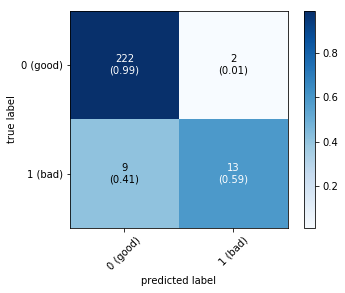


The figure below illustates the best performing classifier from the Binary Classifications
Best classifier is KNeighborsClassifier
Best QoS features for prediction are  ('AB_bytes_per_flow_mean'<br> 'AB_packets_per_flow_mean')



The table below compares other Binary Classifications using the same QoS features, i.e. ('AB_bytes_per_flow_mean', 'AB_packets_per_flow_mean')



Compare f1-scores of high scoring Classifier and Feature Combinations




Multiclass Classifications

The table below shows the first 20 highest scoring Multiclass Classifications


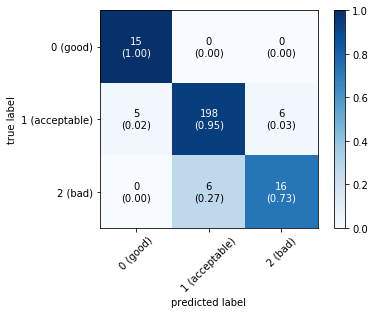


The figure below illustates the best performing classifier from the Multiclass Classifications
Best classifier is RandomForestClassifier
Best QoS features for prediction are  ('flow_duration_mean'<br> 'packets_per_flow_mean'<br> 'AB_bytes_per_flow_mean'<br> 'AB_packets_per_flow_mean'<br> 'RTT_mean')



The table below compares other Multiclass Classifications using the same QoS features, i.e. ('flow_duration_mean', 'packets_per_flow_mean', 'AB_bytes_per_flow_mean', 'AB_packets_per_flow_mean', 'RTT_mean')



Compare f1-scores of high scoring Classifier and Feature Combinations


In [176]:
#with warnings.catch_warnings():
# ignore all caught warnings
#  warnings.filterwarnings("ignore")
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)    
import itertools as it
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
classifiers = [LogisticRegression(),
               DecisionTreeClassifier(max_depth=5),
               KNeighborsClassifier(3),
               LinearDiscriminantAnalysis(),
               RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0),
               GaussianNB(),
               SVC(probability=True),
               #MLPClassifier(alpha=1, max_iter=1000),
               #GaussianProcessClassifier(1.0 * RBF(1.0)),
               AdaBoostClassifier(),
               QuadraticDiscriminantAnalysis()]
#classifiers = [LogisticRegression(),DecisionTreeClassifier(max_depth=5),KNeighborsClassifier(3),
#               RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0),
#               GaussianNB(),SVC(),MLPClassifier()]
#classifiers = [LogisticRegression(),
#               RandomForestClassifier(max_depth=5,n_estimators=3, random_state=0)]
classifications=[
    {
        'desc':"Binary Classifications",
        'bins':[0,indexNoStressHigh,np.inf],
        'names':['0 (good)','1 (bad)'],
        #'names':[0,1],
        'low': indexNoStressHigh,
        'high':indexNoStressHigh
    },
    {
        'desc':"Multiclass Classifications",
        'bins':[0,indexNoStressLow,indexNoStressHigh,np.inf],
        'names': ['0 (good)','1 (acceptable)','2 (bad)'], 
        #'names': [0,1,2], 
        'low': indexNoStressLow,
        'high':indexNoStressHigh

        
    }
]
_features = pd.DataFrame()    
_features['flow_duration_mean'] = dfSkydiveFlowsLabeledAgg['flow_duration']['mean']
_features['bytes_per_flow_mean'] = dfSkydiveFlowsBytesPerFlowLabeledAgg['bytes_per_flow']['mean'] 
_features['packets_per_flow_mean'] = dfSkydiveFlowsPacketsPerFlowLabeledAgg['packets_per_flow']['mean'] 
_features['AB_bytes_per_flow_mean'] = dfSkydiveFlowsABBytesPerFlowLabeledAgg['AB_bytes_per_flow']['mean'] 
_features['BA_bytes_per_flow_mean'] = dfSkydiveFlowsBABytesPerFlowLabeledAgg['BA_bytes_per_flow']['mean'] 
_features['AB_packets_per_flow_mean'] = dfSkydiveFlowsABPacketsPerFlowLabeledAgg['AB_packets_per_flow']['mean'] 
_features['BA_packets_per_flow_mean'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAgg['BA_packets_per_flow']['mean']
_features['RTT_mean'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['mean']


_test_features = pd.DataFrame()    
_test_features['flow_duration_mean'] = dfSkydiveFlowsLabeledAggTest['flow_duration']['mean']
_test_features['bytes_per_flow_mean'] = dfSkydiveFlowsBytesPerFlowLabeledAggTest['bytes_per_flow']['mean'] 
_test_features['packets_per_flow_mean'] = dfSkydiveFlowsPacketsPerFlowLabeledAggTest['packets_per_flow']['mean'] 
_test_features['AB_bytes_per_flow_mean'] = dfSkydiveFlowsABBytesPerFlowLabeledAggTest['AB_bytes_per_flow']['mean'] 
_test_features['BA_bytes_per_flow_mean'] = dfSkydiveFlowsBABytesPerFlowLabeledAggTest['BA_bytes_per_flow']['mean'] 
_test_features['AB_packets_per_flow_mean'] = dfSkydiveFlowsABPacketsPerFlowLabeledAggTest['AB_packets_per_flow']['mean'] 
_test_features['BA_packets_per_flow_mean'] = dfSkydiveFlowsBAPacketsPerFlowLabeledAggTest['BA_packets_per_flow']['mean']
_test_features['RTT_mean'] = dfSkydiveFlowsRTTLabeledAgg['Metric.RTT']['mean']



#print("Do ML Classification")
#print("training set size",_features.shape[0])
#print("testing set size",_test_features.shape[0])
print("QoS features:")
for f in list(_features.columns):
    print("      ",f)
print("Classifiers:")
for clf in classifiers:
    print("      ",str(clf)[0:str(clf).index('(')])
print("Estimate QoE from QoS using the classifiers (described above) with all combinations of features (descibed above) and rank their results.")
for classification in classifications:
    print("")
    print("")
    print("{}".format(classification["desc"]))    
    dfCombinationScores = pd.DataFrame(columns = ['Features','Classifier','f1_score','accuracy_score','log_loss_score'])
    #dfCombinationScores = pd.DataFrame()
    bestClassifiers = []
    qoeTables=[]
    scores=[] 
    bins = classification['bins']
    names = classification['names']
    targets = pd.cut(dfIndex['elapse_time'], bins,labels=names)
    test_targets = pd.cut( dfIndexTest['elapse_time'], bins,labels=names)
    for i in range(1,_features.shape[1]+1):
    #okfor i in range(1,2):
        for comb in it.combinations(list(_features.columns),i):
            #print(comb)
            features = pd.DataFrame()
            test_features = pd.DataFrame()
            for f in comb:
                features[f] = _features[f]
                test_features[f] = _test_features[f]
            X_train, X_test, y_train, y_test = train_test_split(features,targets, test_size=0.0, random_state=0)
            bestClassifier, dfValidationScores = QoEEstimator(classifiers,X_train, y_train,test_features,test_targets)
            qoeTable = ff.create_table(dfValidationScores)
            bestClassifiers.append(bestClassifier.copy())
            qoeTables.append(qoeTable)
            sep=','
            dfValidationScores["Features"] = sep.join(comb)
            scores.append(dfValidationScores)
            dfCombinationScores = dfCombinationScores.append({
                'Features' : str(comb).replace(",","<br>"),
                'Classifier' : bestClassifier["classifier"], 
                'f1_score' :  bestClassifier["f1_score"],
                'accuracy_score' :  bestClassifier["accuracy_score"],
                #"roc_auc_score" : bestClassifier["roc_auc_score"],
                "log_loss_score" : bestClassifier["log_loss_score"]
            },ignore_index=True)
            
#    dfCombinationScores = dfCombinationScores.sort_values(by=['f1_score','accuracy_score'], ascending=False)
    dfCombinationScores = dfCombinationScores.sort_values(
#      by=['f1_score','accuracy_score',"roc_auc_score",'log_loss_score'], ascending=[False,False,False,True]).round(3).reset_index()
       by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True]).round(3)

    bestIndex = dfCombinationScores.index[0]
    bestClassifier = bestClassifiers[bestIndex]
    bestFeatures = dfCombinationScores.Features[bestIndex]
    qoeTable = qoeTables[bestIndex]
    
    table = ff.create_table(dfCombinationScores.head(20),height_constant=100)
    print("")
    print("The table below shows the first 20 highest scoring {}".format(classification["desc"]))
    iplot(table)
    
    print("")
    cfm = confusion_matrix(bestClassifier["y_test"],bestClassifier["y_pred"])    
    fig, ax = plot_confusion_matrix(conf_mat=cfm,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                class_names=classification["names"])
    #plt.imshow(fig,cmap='gray')
    plt.show()                      

    print("")
    print("The figure below illustates the best performing classifier from the {}".format(classification["desc"]))
    print("Best classifier is {}".format(bestClassifier["classifier"]))
    print("Best QoS features for prediction are  {}".format(bestFeatures))
    title = "QoE from QoS Actual vs Prediction<br> QoE Target: workload duration, <br>classifier: {}, f1_score: {}, accuracy: {}".format(bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))
    #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples','QoE Classifications<br>0 is good  1 is bad',title,names)
    if classification["desc"] == "Binary Classifications":
        #title = "QoE from QoS Actual vs Prediction (Binary Classifications)<br> QoE Target: workload duration,<br>classifier: {}, f1_score: {}, accuracy: {}".format(bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))

        #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples',
        #                   'QoE Classifications',title,names)
        plotWithBoundariesAndEstimations(
            dfIndexTest,'stress_test','elapse_time',
            'testing samples','benchmark duration (ms)',
            'QoE from QoS Actual vs Prediction (Binary Classifications)<br> benchmark under test {}:'.format(benchmarkUnderTest),                                                                               
            indexNoStressHigh,indexNoStressHigh,
            bestClassifier["y_test"],bestClassifier["y_pred"]
        )
    elif classification["desc"] == "Multiclass Classifications":
        #title = "QoE from QoS Actual vs Prediction (Multiclass Classifications)<br> QoE Target: workload duration, QoS features: {} <br>classifier: {}, f1_score: {}, accuracy: {}".format(bestFeatures.replace("<br>",","),bestClassifier["classifier"],str(round(bestClassifier["f1_score"],2)),str(round(bestClassifier["accuracy_score"],2)))
        #plotModelEstimates(bestClassifier["y_test"],bestClassifier["y_pred"],'testing samples',
        #                   'QoE Classifications',title,names)
        plotWithBoundariesAndEstimations(
            dfIndexTest,'stress_test','elapse_time',
            'testing samples',
            'benchmark duration (ms)',
            'QoE from QoS Actual vs Prediction (Multiclass Classifications)<br> benchmark under test {}:'.format(benchmarkUnderTest),
            indexNoStressLow,indexNoStressHigh,
            bestClassifier["y_test"],bestClassifier["y_pred"]
        )
    print("")
    print("The table below compares other {} using the same QoS features, i.e. {}".format(classification["desc"],bestFeatures.replace("<br>",",")))          
    iplot(qoeTable)
    dfScores = pd.concat(scores,sort=False)
    dfScores.sort_values(by=['f1_score','accuracy_score','log_loss_score'], ascending=[False,False,True],inplace=True)
    
    
    print("")
    print("Compare f1-scores of high scoring Classifier and Feature Combinations") 
    plotScores(dfScores[:10].Classifier,dfScores[:10].f1_score,"Classifier","f1_score","Classifier by f1_score")
    plotScores(dfScores[:10].Features,dfScores[:10].f1_score,"Features","f1_score","Features by f1_score")
    plotScores(dfScores[:10].Classifier + ',' + dfScores[:10].Features,dfScores[:10].f1_score,"Classifier + Features","f1_score","Classifier + Features by f1_score")
    
    
    

## Workload Duration evaluation complete!
The rest is experimentation with the data, i.e. under construction.

## Skydive data evaluation

In [177]:
print(dfIndex.groupby(['stress_test']).agg({'elapse_time': ['min','max','median','mean']}).dropna())
print(dfSkydiveFlowsLabeled.groupby(['stress_test']).agg({'flow_duration': ['min','max','median','mean']}).dropna())
#print(dfJmeterLabeled.groupby(['stress_test','transaction']).agg({'avg': ['min','max','median','mean']}).dropna())


                   elapse_time                                 
                           min     max    median           mean
stress_test                                                    
 no_stress              423557  839645  475537.0  543949.072165
iperf-d-1xP50           418547  813377  686615.5  659987.040816
iperf-d-1xP60           430232  830711  751402.0  697049.181818
iperf-d-2xP50           435252  823447  678398.0  641757.752577
iperf-d-2xP60           441182  875144  773193.0  712741.092784
iperf-d-3xP50           479224  881974  715481.0  712891.551020
iperf-d-3xP60           717649  904482  829076.0  825237.354839
iperf-d-4xP60-b10G      744502  909925  836791.0  833878.628866
iperf-d-5xP60           627409  909918  820719.5  818177.541667
iperf-d-5xP60-b10G      726690  908213  841390.0  838994.938144
                   flow_duration                             
                             min     max median          mean
stress_test                                 

In [178]:
#print(dfSkydiveFlowsLabeled.count())
#print(dfSkydiveFlowsLabeled['_source.LastUpdateMetric.ABBytes'].unique())
#print(dfSkydiveFlowsLabeled['_source.LastUpdateMetric.BABytes'].unique())
#todo have to merge these for flowduration
print("examine uuid to see if it is unique")
print(dfSkydiveFlowsLabeled.shape)
vc = dfSkydiveFlowsLabeled["UUID"].value_counts()
#print(dfSkydiveFlowsLabeled.count())
print( vc[vc > 1])
#df_temp = dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled["_source.UUID"].value_counts() > 1]
df_temp = dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled.duplicated()]
print(df_temp.shape)
print(df_temp.head(20))                                                                            
#print(list(df_temp.index))
df_temp = dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled["UUID"].isin(df_temp.index)]
#df_temp = dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled["_source.UUID"].value_counts() > 1]
print(df_temp.shape)
print(df_temp[["UUID",'Metric.Start','Metric.Last','flow_duration']].sort_values(by=["UUID"]).head(20))

#dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled["_source.UUID"] == 'd0ce31611f3d1317' ]
#print(dfSkydiveFlowsLabeled[["_source.UUID",'_source.Metric.Start','_source.Metric.Last','flow_duration']].sort_values(by=["_source.UUID"]))
#print(dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled["_source.UUID"] == 'd0ce31611f3d1317' ][["_source.UUID",'_source.Metric.Start','_source.Metric.Last','flow_duration']])
#print(dfSkydiveFlowsLabeled[[dfSkydiveFlowsLabeled["_source.UUID"] == 'd0ce31611f3d1317' ]["_source.UUID",'_source.Metric.Start','_source.Metric.Last','flow_duration']])

examine uuid to see if it is unique
(594592, 49)
Series([], Name: UUID, dtype: int64)
(0, 49)
Empty DataFrame
Columns: [Unnamed: 0, Application, IPMetric.FragmentErrors, IPMetric.Fragments, L3TrackingID, Last, LayersPath, Link.A, Link.B, Link.ID, Link.Protocol, Metric.ABBytes, Metric.ABPackets, Metric.BABytes, Metric.BAPackets, Metric.Last, Metric.RTT, Metric.Start, Network.A, Network.B, Network.ID, Network.Protocol, NodeTID, ParentUUID, RawPacketsCaptured, Start, TrackingID, Transport.A, Transport.B, Transport.ID, Transport.Protocol, UUID, LastUpdateMetric.ABBytes, LastUpdateMetric.ABPackets, LastUpdateMetric.BABytes, LastUpdateMetric.BAPackets, LastUpdateMetric.Last, LastUpdateMetric.RTT, LastUpdateMetric.Start, begin, stress_test, workload, flow_duration, bytes_per_flow, AB_bytes_per_flow, BA_bytes_per_flow, packets_per_flow, AB_packets_per_flow, BA_packets_per_flow]
Index: []

[0 rows x 49 columns]
(0, 49)
Empty DataFrame
Columns: [UUID, Metric.Start, Metric.Last, flow_duration]
In

In [179]:
#dfSkydiveFlowsLabeledAgg = dfSkydiveFlowsLabeled.groupby(['begin','stress_test']).agg({'flow_duration': ['min','max','median','mean','std']}).dropna().reset_index()

plot4Ms(dfSkydiveFlowsLabeledAgg,'begin','flow_duration','training samples','flow duration (ms)','HTTP Non-Persistent Connection <br> Wordpress Flow Duration (QoS)')
#print(dfSkydiveFlowsLabeledAgg)
#dfSkydiveFlowsLabeledAgg['flow_duration']['median'].plot(kind='line',title='median flow duration (QoS)')

In [180]:

plot4Ms(dfSkydiveFlowsRTTLabeledAggTest,'begin','Metric.RTT','testing samples','RTT','HTTP Non-Persistent Connection <br> Wordpress Flow Duration (QoS)')

## Jmeter data evaluation

In [181]:
print(dfJmeterLabeled.groupby(['stress_test','transaction']).agg({'avg': ['min','max','median','mean']}).dropna())

                                          avg                              
                                          min    max   median          mean
stress_test        transaction                                             
 no_stress         get_15MB             20093  38971  30527.0  30820.769781
                   get_500K               366  15791   5199.0   5479.976008
                   get_5MB               4679  23493  12852.0  12739.006803
                   get_helloworld_post    151  35879   4245.5   5582.051655
                   home_page              293  33393   5592.5   6859.011685
iperf-d-1xP50      get_15MB             14018  38916  30685.0  30830.542021
                   get_500K               380  25544   5275.0   5678.957715
                   get_5MB               4372  23713  13051.0  12830.932705
                   get_helloworld_post    290  29048   9574.0   8567.939394
                   home_page              315  31833   9636.5   9226.133364
iperf-d-1xP6

In [182]:
plot4Ms(dfJmeterLabeledAgg,'begin','avg','training samples','response time (ms)','HTTP Non-Persistent Connection <br> Wordpress Response Time (QoE)')

In [183]:

dfJmeterLabeledAgg = dfJmeterLabeled.groupby(['begin','transaction']).agg({'avg': ['min','max','median','mean','std']}).dropna().reset_index()
dfJmeterLabeledStressAgg = dfJmeterLabeled.groupby(['transaction','stress_test']).agg({'avg': ['min','max','median','mean','std']}).dropna().reset_index()
print(dfJmeterLabeledStressAgg.head())

for t in dfJmeterLabeledStressAgg.transaction.unique():
    print(t)
    df = dfJmeterLabeledStressAgg[(dfJmeterLabeledStressAgg["transaction"] == t) & (dfJmeterLabeledStressAgg["stress_test"] == " no_stress")]
    low = round(max(df['avg']['max']))
    high = round(max(df['avg']['max']+df['avg']['std']*4))
    print(low)
    print(high)
    df = dfJmeterLabeledStressAgg[(dfJmeterLabeledStressAgg["transaction"] == t)]
    plot4MsWithThreshholds(df,'stress_test','avg','training stress configurations','avg request duration (ms)','Avg REST request Duration (QoE)<br> workload: wp5<br>Single threshold for Binary Classification',high,high)
    plot4MsWithThreshholds(df,'stress_test','avg','training stress configurations','avg request duration (ms)','Avg REST request Duration (QoE)<br> workload: wp5<br>Multiple thresholds for Multiclass Classification',low,high)

  transaction    stress_test    avg                                           
                                min    max   median          mean          std
0    get_15MB      no_stress  20093  38971  30527.0  30820.769781  3099.898773
1    get_15MB  iperf-d-1xP50  14018  38916  30685.0  30830.542021  3064.491417
2    get_15MB  iperf-d-1xP60  24384  38862  30510.5  30844.411877  3059.702315
3    get_15MB  iperf-d-2xP50  18330  39019  30515.0  30941.825819  2960.063701
4    get_15MB  iperf-d-2xP60  21131  39011  30283.0  30760.952614  2933.264994
get_15MB
38971
51371


get_500K
15791
23726


get_5MB
23493
32757


get_helloworld_post
35879
52906


home_page
33393
50420


In [184]:

plot4Ms(dfJmeterLabeledAggTest,'begin','avg','testing samples','service completion time (ms)','Measured QoE (service completion time)')

In [185]:

plot4Ms(dfSkydiveFlowsLabeledAggTest,'begin','flow_duration','testing samples','flow duration (ms)','Measured QoS (flow duration)')

In [186]:
dfJmeterLabeledAgg1 = dfJmeterLabeled.groupby(['stress_test']).agg({'avg': ['min','max','median','mean','std']}).dropna()
print(dfJmeterLabeledAgg1)
#dfJmeterLabeledAgg1['avg']['median'].plot(kind='line',title='median avg resonse time (QoE)')

                    avg                                            
                    min    max   median          mean           std
stress_test                                                        
 no_stress          151  38971   7965.5  12150.999320  10012.372510
iperf-d-1xP50       290  38916  11453.0  13316.092061   9527.935503
iperf-d-1xP60       313  38862  11785.0  13408.137176   9506.659948
iperf-d-2xP50       297  39019  11010.0  13231.269482   9567.598965
iperf-d-2xP60       288  39011  11805.0  13443.528398   9490.364793
iperf-d-3xP50       526  39016  15792.0  16754.454725   8768.154858
iperf-d-3xP60       694  38972  17889.5  19147.836756   9500.907823
iperf-d-4xP60-b10G  941  39035  18039.0  19512.409342   9698.570428
iperf-d-5xP60       521  38896  17666.5  19200.292999   9523.730015
iperf-d-5xP60-b10G  556  39021  18364.5  19739.902110   9825.794515


In [187]:
#plotAgg2(dfJmeterLabeledAgg1.reset_index(),dfSkydiveFlowsLabeledAgg1.reset_index(),'avg','median','flow_duration','median','begin','median avg response time','median flow duration (QoS)','begin','millisecond','median avg response time (QoE) and flow duration (Qos)' )

## correlation on aggregations of avg response time (QoE) and flow duration (Qos) (merge based on begin time for multiple samples)

In [188]:
df1 = dfJmeterLabeledAgg
df2 = dfSkydiveFlowsLabeledAgg
#df1 = df1[['time','avg']]
#df2 = df2[['_source.Metric.Last','flow_duration']]
dfMerged = pd.merge(df1,df2,left_on='begin',right_on='begin').dropna()
#df = df[df['flow_duration'] != 0]
#print(df.head())
#print(df.count())
#print(df['avg']['median'].corr(df['flow_duration']['median'],method='spearman'))
print("median correlation",dfMerged['avg']['median'].corr(dfMerged['flow_duration']['median'],method='pearson'))
print("mean correlation",dfMerged['avg']['mean'].corr(dfMerged['flow_duration']['mean'],method='pearson'))
print("min correlation",dfMerged['avg']['min'].corr(dfMerged['flow_duration']['min'],method='pearson'))
print("max correlation",dfMerged['avg']['max'].corr(dfMerged['flow_duration']['max'],method='pearson'))
print("std correlation",dfMerged['avg']['std'].corr(dfMerged['flow_duration']['std'],method='pearson'))

median correlation -0.27098941901429796
mean correlation 0.003998479815910927
min correlation 0.31232982268071663
max correlation 0.03523909204282337
std correlation -0.002749274782219589


/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:3946: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [189]:
#print(dfSkydiveFlowsRTTLabeledAgg.head(10))
#columns = ['_source.Metric.RTT']
#dfRTT = dfSkydiveFlowsRTTLabeledAgg['_source.Metric.RTT'].drop(columns,axis=1)
#print(dfRTT)


## Debugging data
* 

In [190]:
#for b in dfJmeterLabeled.begin.unique():
#    stress = dfIndex[dfIndex.begin == b].stress_test
#    plotJmeter(dfJmeterLabeled[dfJmeterLabeled.begin == b],"wordpress response time (QoE) sample "+str(b)+" ("+stress+")")
#    plotSkydiveFlows(dfSkydiveFlowsLabeled[dfSkydiveFlowsLabeled.begin == b],"wordpress flow duration (QoS) sample "+str(b)+" ("+stress+")","flow_duration","flow duration (ms)")

   